In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pl.read_csv("../dumps/voip_simulation_data.csv")
data.head()

timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,total_packets,packet_loss_percent,rtt_ms,mos,r_factor,net_rx_pkts,net_rx_bytes,net_rx_drop,net_rx_errs,net_tx_pkts,net_tx_bytes,net_tx_drop,net_tx_errs,link_utilization_percent,packets_per_second,drop_rate_percent,error_rate_percent,one_way_delay_ms,congestion_score,burstiness_score,throughput_efficiency,avg_inter_packet_time_ms,std_inter_packet_time_ms,packet_size_variance,retransmission_rate_percent,out_of_order_rate_percent,bytes_per_second
f64,str,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.2,"""h13->h10""",0.0,0.2,1.18e6,75.023,80,100,80.0,0.0,1.151999,16.251519,0,0,0,0,0,0,0,0,11.8,500.0,0.0,0.0,0.0,0.6472,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
0.4,"""h13->h10""",0.2,0.4,118000.0,65.993,0,2,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,1.18,10.0,0.0,0.0,0.0,0.20472,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0.6,"""h13->h10""",0.4,0.6,118000.0,58.049,0,2,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,1.18,10.0,0.0,0.0,0.0,0.20472,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0.8,"""h13->h10""",0.6,0.8,58800.0,54.421,0,1,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,0.588,5.0,0.0,0.0,0.0,0.202352,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,"""h13->h10""",0.8,1.0,118000.0,47.832,0,2,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,1.18,10.0,0.0,0.0,0.0,0.196048,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,total_packets,packet_loss_percent,rtt_ms,mos,r_factor,net_rx_pkts,net_rx_bytes,net_rx_drop,net_rx_errs,net_tx_pkts,net_tx_bytes,net_tx_drop,net_tx_errs,link_utilization_percent,packets_per_second,drop_rate_percent,error_rate_percent,one_way_delay_ms,congestion_score,burstiness_score,throughput_efficiency,avg_inter_packet_time_ms,std_inter_packet_time_ms,packet_size_variance,retransmission_rate_percent,out_of_order_rate_percent,bytes_per_second
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",260721.0,"""260721""",260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1751.638131,null,1751.245441,1751.638131,100263.132621,0.078315,0.024018,3.356531,0.108883,167.630536,4.351246,90.801468,384.229947,255716.750442,0.0,0.0,377.00853,255207.700699,0.0,0.0,1.002631,8.563599,0.0,0.0,83.815268,0.00529,0.0,0.999237,0.0,0.0,0.0,0.0,0.0,0.0
"""std""",1042.883295,null,1042.875374,1042.883295,28575.511561,1.465369,3.124115,224.334469,2.256161,124.12502,0.166271,4.247766,113.013928,74806.066735,0.0,0.0,112.158325,75037.029749,0.0,0.0,0.285755,10.72261,0.0,0.0,62.06251,0.020776,0.0,0.020046,0.0,0.0,0.0,0.0,0.0,0.0
"""min""",0.2,"""h0->h8""",0.0,0.2,58800.0,0.003,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.588,4.997501,0.0,0.0,0.0,0.002364,0.0,0.021018,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",843.6042,null,843.2042,843.6042,58800.0,0.011,0.0,1.0,0.0,93.7,4.34963,90.44,353.0,237916.0,0.0,0.0,353.0,237564.0,0.0,0.0,0.588,5.0,0.0,0.0,46.85,0.002532,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""50%""",1722.8086,null,1722.4086,1722.8086,118000.0,0.016,0.0,2.0,0.0,169.0,4.366645,91.172,370.0,252056.0,0.0,0.0,368.0,251034.0,0.0,0.0,1.18,10.0,0.0,0.0,84.5,0.004764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""75%""",2656.4133,null,2656.0133,2656.4133,118000.0,0.033,0.0,2.0,0.0,230.0,4.386472,92.0756,406.0,264110.0,0.0,0.0,390.0,263158.0,0.0,0.0,1.18,10.0,0.0,0.0,115.0,0.004816,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""max""",3588.8729,"""h9->h4""",3588.8179,3588.8729,1.29e6,115.67,969.0,30616.0,98.0,2713.0,4.409286,93.2,2804.0,1.923e6,0.0,0.0,2748.0,1.915432e6,0.0,0.0,12.9,4520.0,0.0,0.0,1356.5,0.6516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
USED_COLUMNS = [
    "timestamp",
    "flow_id",
    "interval_start",
    "interval_end",
    "bandwidth_bps",
    "jitter_ms",
    "packet_loss_cnt",
    "packet_loss_percent",
    "rtt_ms",
    "mos",
    "link_utilization_percent",
    "packets_per_second",
    "congestion_score",
    "one_way_delay_ms",
    "throughput_efficiency",
    "net_tx_pkts",
    "net_tx_bytes",
]

df = data.select(USED_COLUMNS)
df.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",260721.0,"""260721""",260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1751.638131,null,1751.245441,1751.638131,100263.132621,0.078315,0.024018,0.108883,167.630536,4.351246,1.002631,8.563599,0.00529,83.815268,0.999237,377.00853,255207.700699
"""std""",1042.883295,null,1042.875374,1042.883295,28575.511561,1.465369,3.124115,2.256161,124.12502,0.166271,0.285755,10.72261,0.020776,62.06251,0.020046,112.158325,75037.029749
"""min""",0.2,"""h0->h8""",0.0,0.2,58800.0,0.003,0.0,0.0,0.0,1.0,0.588,4.997501,0.002364,0.0,0.021018,0.0,0.0
"""25%""",843.6042,null,843.2042,843.6042,58800.0,0.011,0.0,0.0,93.7,4.34963,0.588,5.0,0.002532,46.85,1.0,353.0,237564.0
"""50%""",1722.8086,null,1722.4086,1722.8086,118000.0,0.016,0.0,0.0,169.0,4.366645,1.18,10.0,0.004764,84.5,1.0,368.0,251034.0
"""75%""",2656.4133,null,2656.0133,2656.4133,118000.0,0.033,0.0,0.0,230.0,4.386472,1.18,10.0,0.004816,115.0,1.0,390.0,263158.0
"""max""",3588.8729,"""h9->h4""",3588.8179,3588.8729,1.29e6,115.67,969.0,98.0,2713.0,4.409286,12.9,4520.0,0.6516,1356.5,1.0,2748.0,1.915432e6


In [5]:
df = df.cast(
    {
        "timestamp": pl.Int32,
        "interval_start": pl.Int32,
        "interval_end": pl.Int32,
    }
)

df.head()

timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
i32,str,i32,i32,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64
0,"""h13->h10""",0,0,1.18e6,75.023,80,80.0,0.0,1.151999,11.8,500.0,0.6472,0.0,0.2,0,0
0,"""h13->h10""",0,0,118000.0,65.993,0,0.0,0.0,4.409286,1.18,10.0,0.20472,0.0,1.0,0,0
0,"""h13->h10""",0,0,118000.0,58.049,0,0.0,0.0,4.409286,1.18,10.0,0.20472,0.0,1.0,0,0
0,"""h13->h10""",0,0,58800.0,54.421,0,0.0,0.0,4.409286,0.588,5.0,0.202352,0.0,1.0,0,0
1,"""h13->h10""",0,1,118000.0,47.832,0,0.0,0.0,4.409286,1.18,10.0,0.196048,0.0,1.0,0,0


In [6]:
df = df.with_columns(
    flow_start=pl.col("flow_id").str.split("->").list.get(0),
    flow_end=pl.col("flow_id").str.split("->").list.get(-1),
)

df.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes,flow_start,flow_end
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""count""",260721.0,"""260721""",260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,"""260721""","""260721"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",1751.229349,null,1750.836737,1751.229349,100263.132621,0.078315,0.024018,0.108883,167.630536,4.351246,1.002631,8.563599,0.00529,83.815268,0.999237,377.00853,255207.700699,null,null
"""std""",1042.878065,null,1042.870117,1042.878065,28575.511561,1.465369,3.124115,2.256161,124.12502,0.166271,0.285755,10.72261,0.020776,62.06251,0.020046,112.158325,75037.029749,null,null
"""min""",0.0,"""h0->h8""",0.0,0.0,58800.0,0.003,0.0,0.0,0.0,1.0,0.588,4.997501,0.002364,0.0,0.021018,0.0,0.0,"""h0""","""h0"""
"""25%""",843.0,null,843.0,843.0,58800.0,0.011,0.0,0.0,93.7,4.34963,0.588,5.0,0.002532,46.85,1.0,353.0,237564.0,null,null
"""50%""",1722.0,null,1722.0,1722.0,118000.0,0.016,0.0,0.0,169.0,4.366645,1.18,10.0,0.004764,84.5,1.0,368.0,251034.0,null,null
"""75%""",2656.0,null,2656.0,2656.0,118000.0,0.033,0.0,0.0,230.0,4.386472,1.18,10.0,0.004816,115.0,1.0,390.0,263158.0,null,null
"""max""",3588.0,"""h9->h4""",3588.0,3588.0,1.29e6,115.67,969.0,98.0,2713.0,4.409286,12.9,4520.0,0.6516,1356.5,1.0,2748.0,1.915432e6,"""h9""","""h9"""


In [7]:
df = df.sort(["flow_id", "timestamp"])
df.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes,flow_start,flow_end
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""count""",260721.0,"""260721""",260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,260721.0,"""260721""","""260721"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",1751.229349,null,1750.836737,1751.229349,100263.132621,0.078315,0.024018,0.108883,167.630536,4.351246,1.002631,8.563599,0.00529,83.815268,0.999237,377.00853,255207.700699,null,null
"""std""",1042.878065,null,1042.870117,1042.878065,28575.511561,1.465369,3.124115,2.256161,124.12502,0.166271,0.285755,10.72261,0.020776,62.06251,0.020046,112.158325,75037.029749,null,null
"""min""",0.0,"""h0->h8""",0.0,0.0,58800.0,0.003,0.0,0.0,0.0,1.0,0.588,4.997501,0.002364,0.0,0.021018,0.0,0.0,"""h0""","""h0"""
"""25%""",843.0,null,843.0,843.0,58800.0,0.011,0.0,0.0,93.7,4.34963,0.588,5.0,0.002532,46.85,1.0,353.0,237564.0,null,null
"""50%""",1722.0,null,1722.0,1722.0,118000.0,0.016,0.0,0.0,169.0,4.366645,1.18,10.0,0.004764,84.5,1.0,368.0,251034.0,null,null
"""75%""",2656.0,null,2656.0,2656.0,118000.0,0.033,0.0,0.0,230.0,4.386472,1.18,10.0,0.004816,115.0,1.0,390.0,263158.0,null,null
"""max""",3588.0,"""h9->h4""",3588.0,3588.0,1.29e6,115.67,969.0,98.0,2713.0,4.409286,12.9,4520.0,0.6516,1356.5,1.0,2748.0,1.915432e6,"""h9""","""h9"""


In [8]:
TARGET_COLUMNS = [
    "bandwidth_bps",
    "jitter_ms",
    "packet_loss_percent",
    "rtt_ms",
    "mos",
    "link_utilization_percent",
    "packets_per_second",
    "congestion_score",
    "one_way_delay_ms",
    "throughput_efficiency",
    "net_tx_pkts",
    "net_tx_bytes",
]

In [9]:
def plot_device_stats(
    metric: str,
    figsize=(15, 6),
    flow_side: str = "flow_start",
    logscale=False,
):
    plt.figure(figsize=figsize)

    for flow in df[flow_side].unique():
        subset = df.filter(pl.col(flow_side) == flow)
        plt.plot(subset["timestamp"], subset[metric], label=flow)

    plt.xlabel("Timestamp")
    plt.ylabel(metric)
    plt.title(f"{metric} over time by {flow_side}")
    plt.legend()

    if logscale:
        plt.yscale("log")
    plt.show()

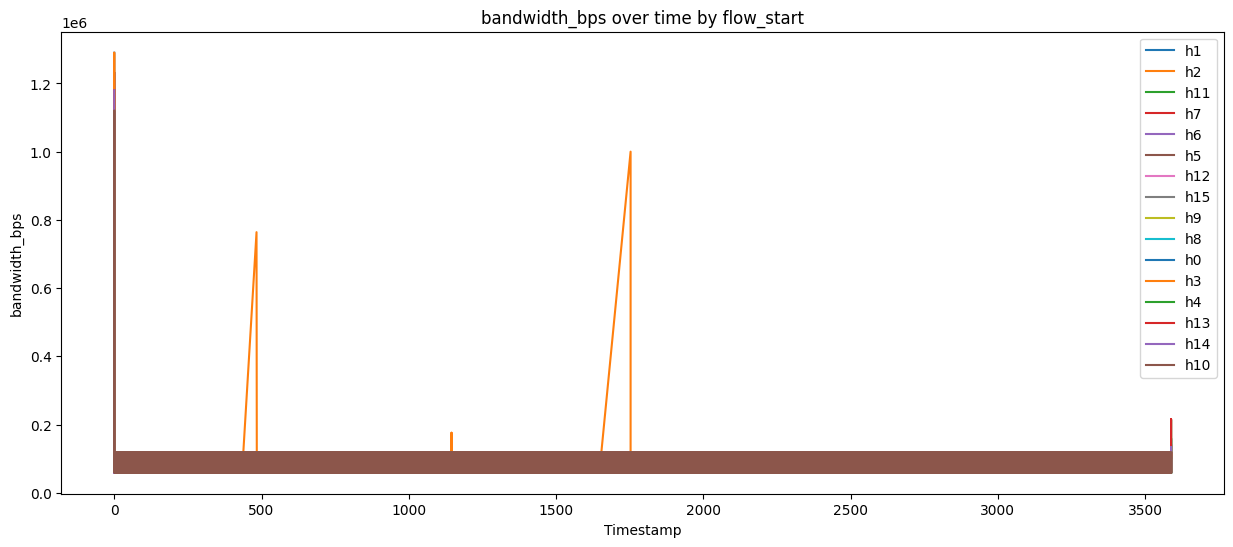

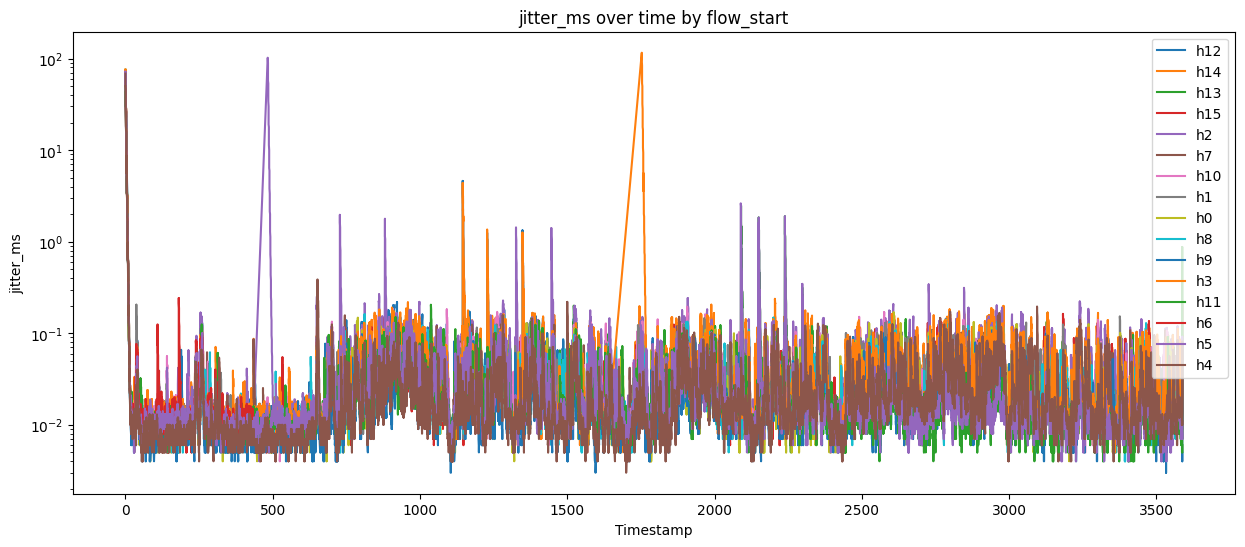

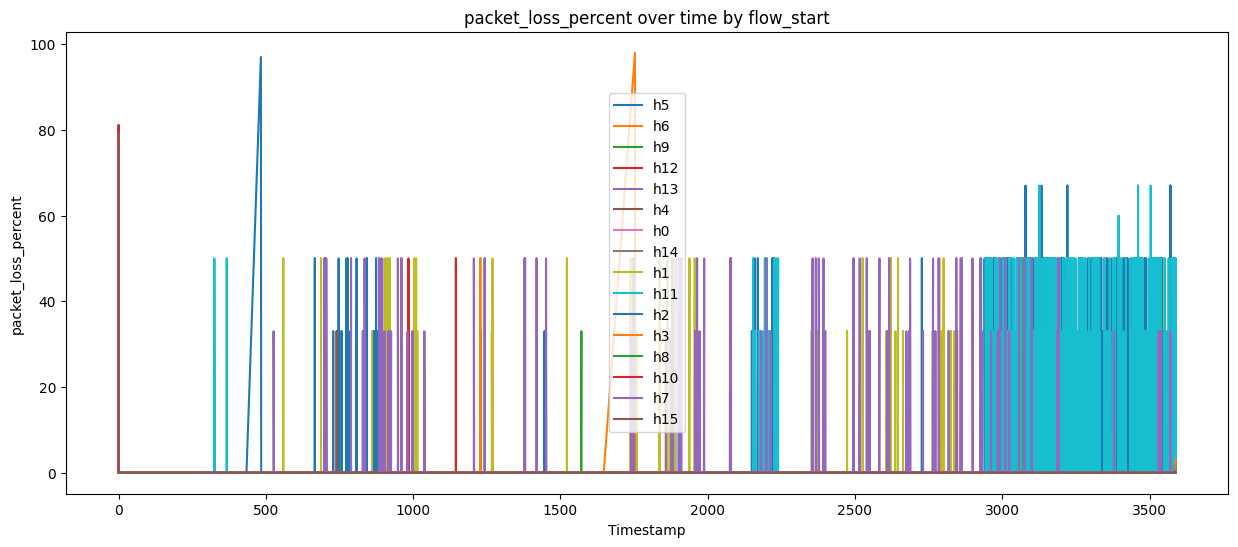

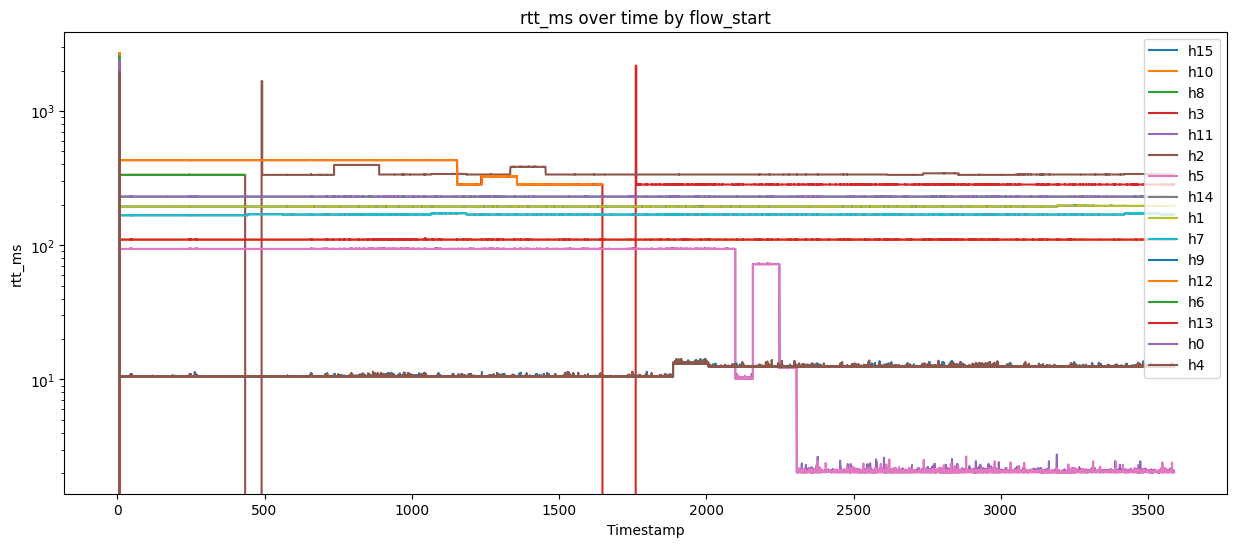

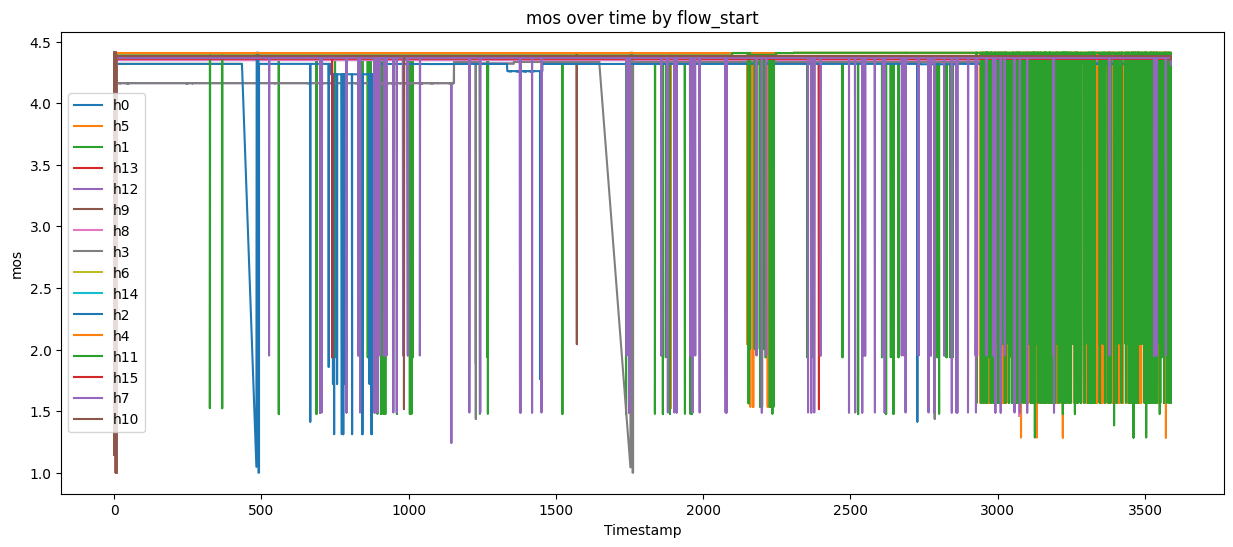

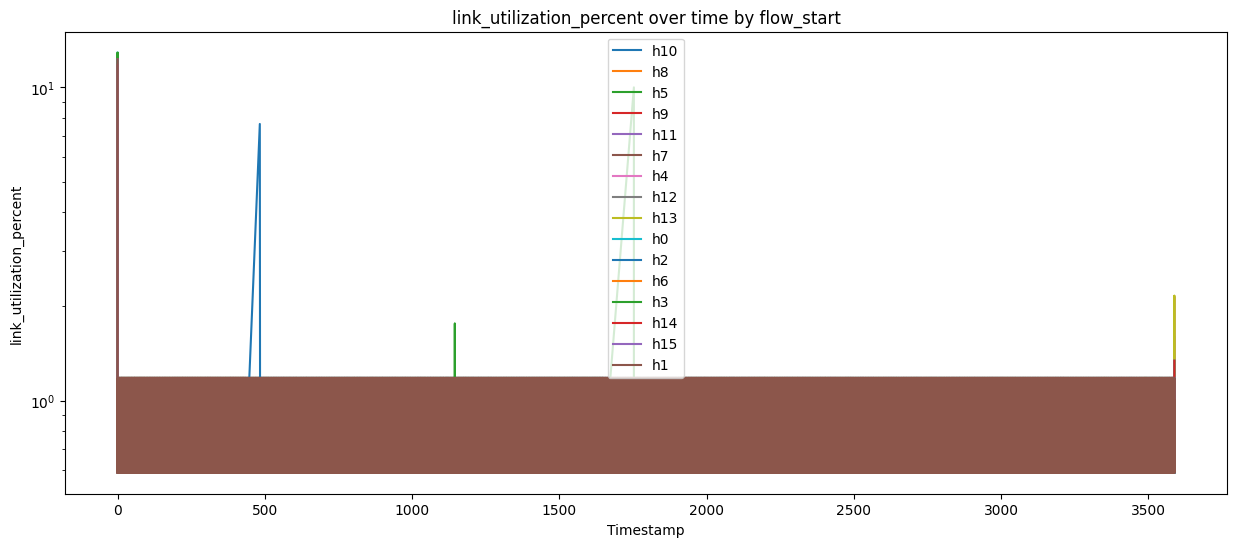

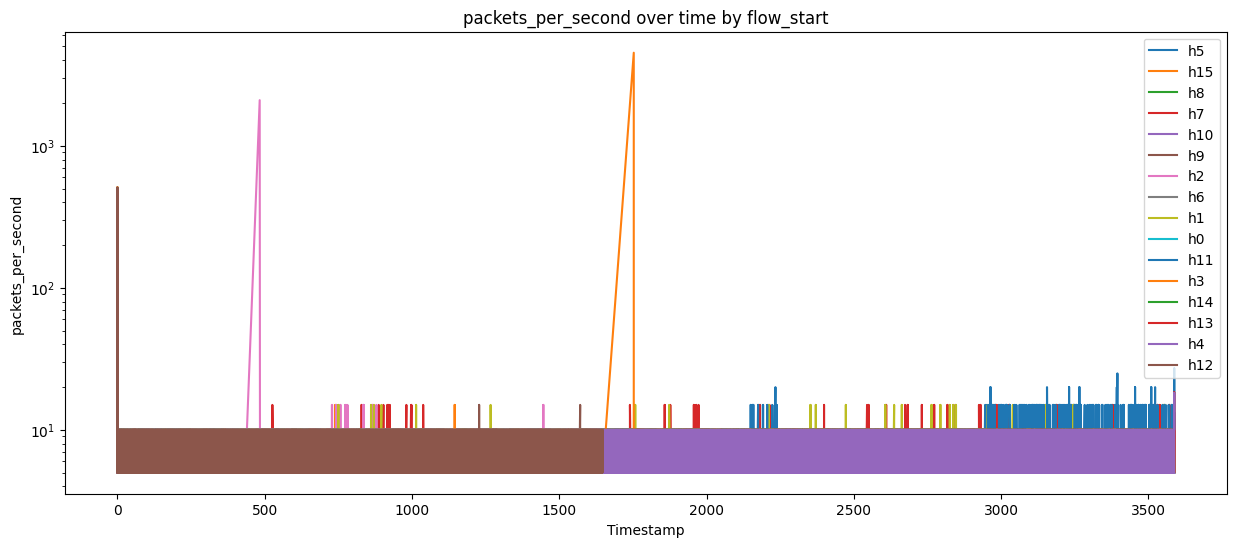

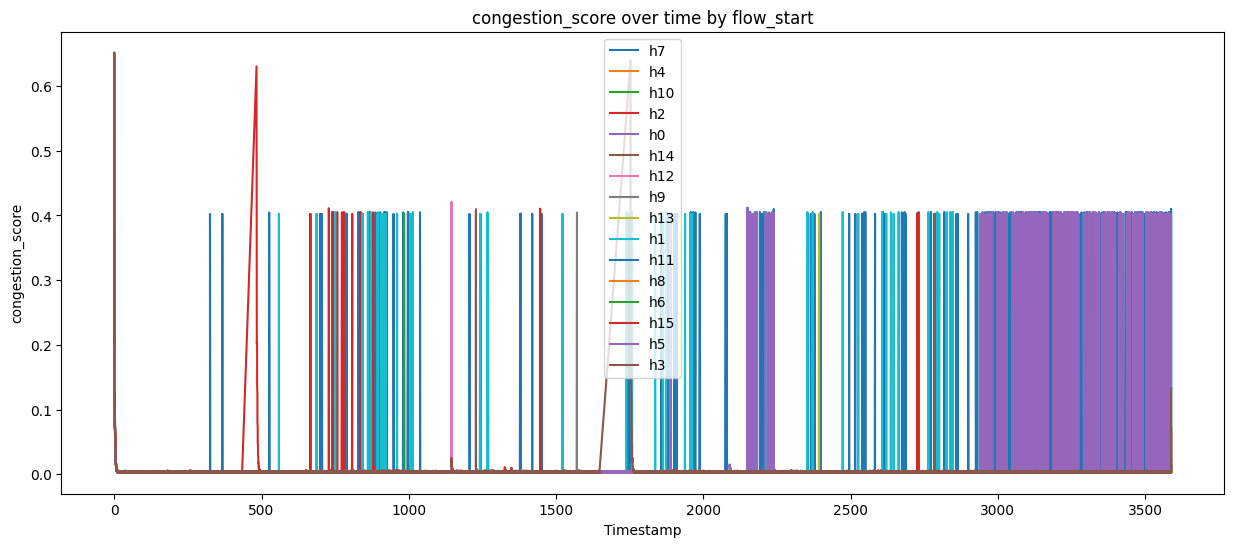

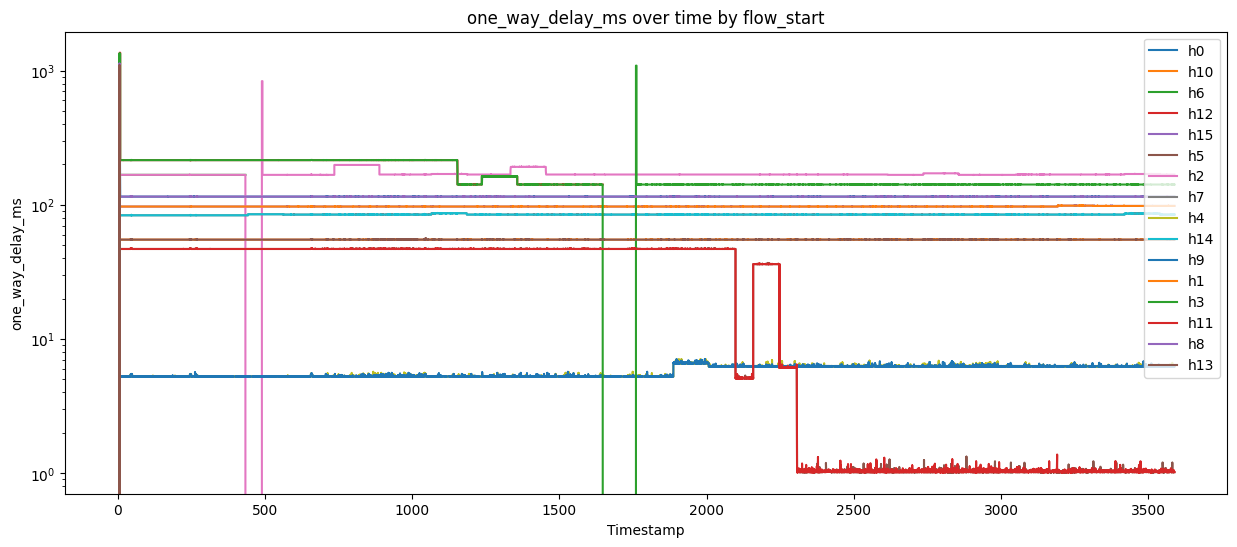

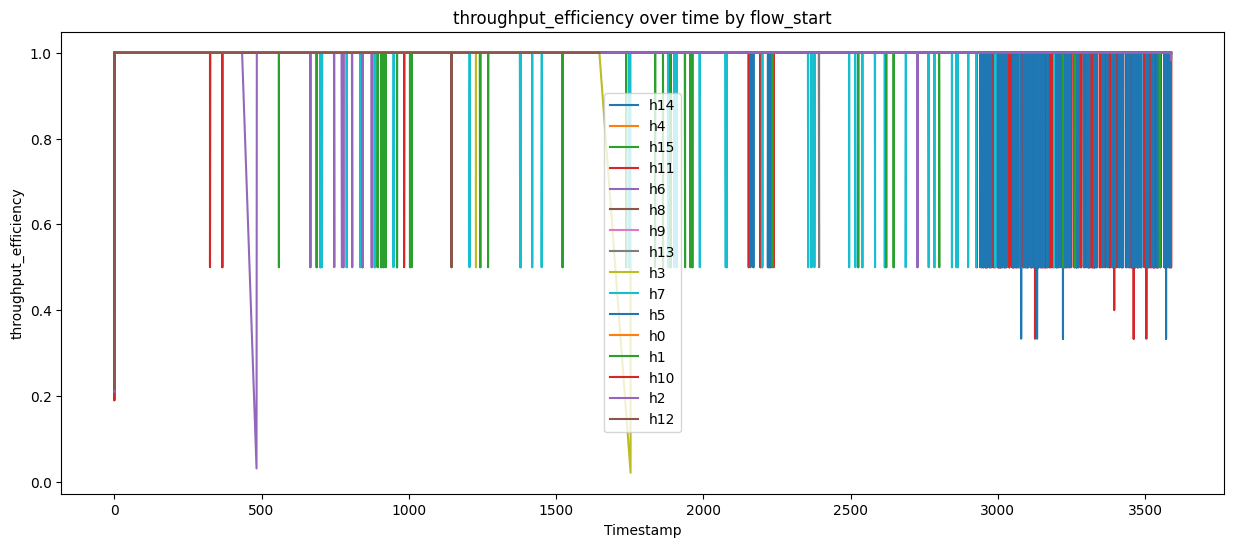

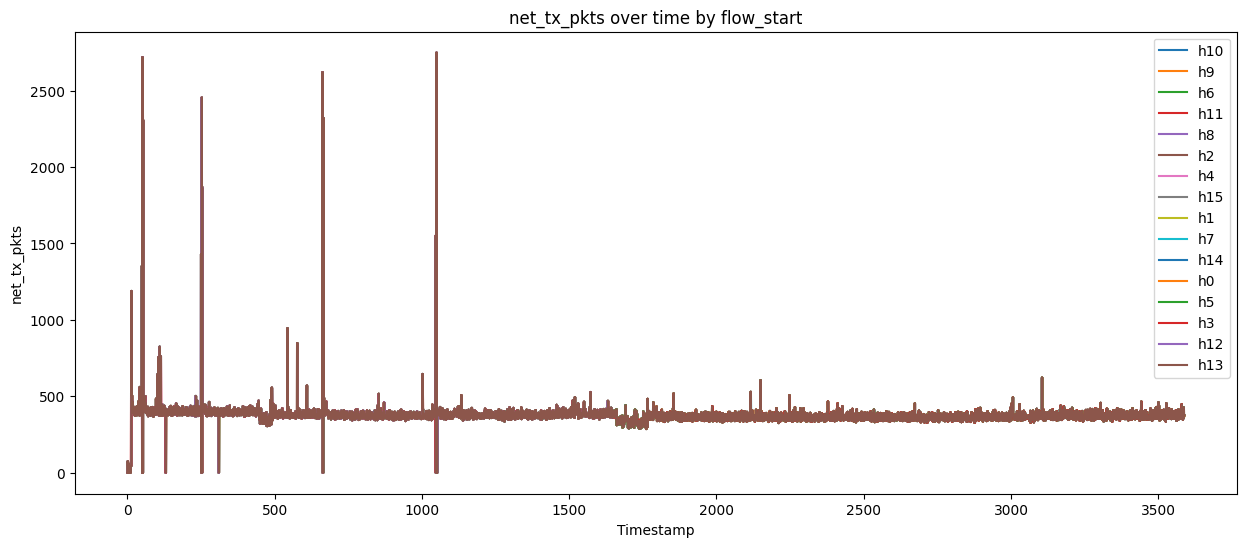

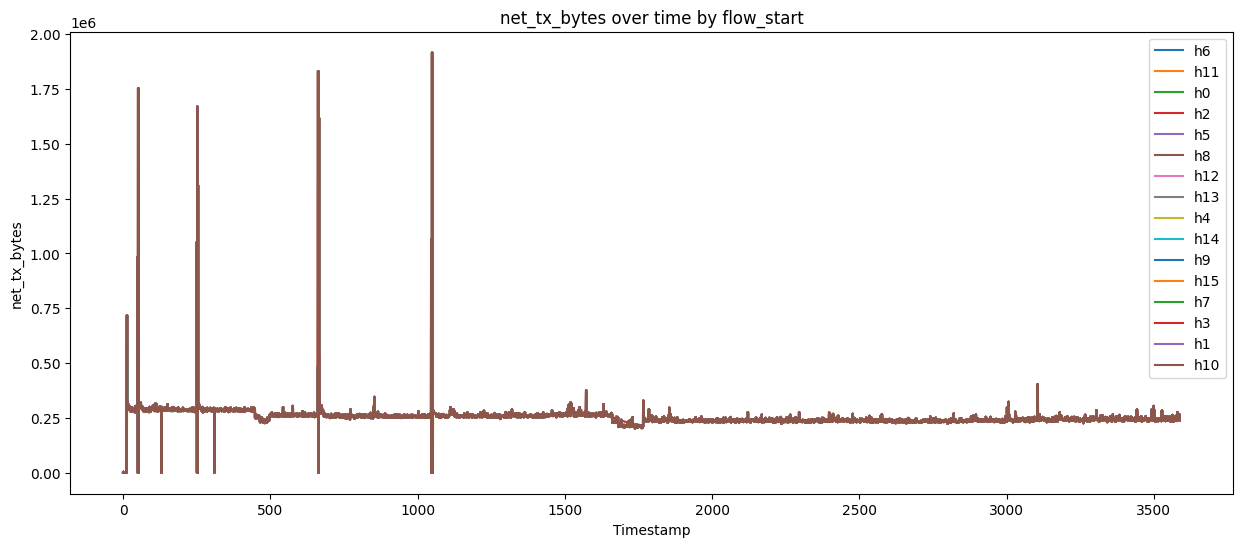

In [10]:
logscale_cols = [
    "jitter_ms",
    # "congestion_score",
    # "net_tx_pkts",
    # "net_tx_bytes",
    # "bandwidth_bps",
    "packets_per_second",
    "link_utilization_percent",
    "one_way_delay_ms",
    "rtt_ms",
]

for col in TARGET_COLUMNS:
    plot_device_stats(col, logscale=col in logscale_cols)

In [11]:
df.group_by("flow_start").all().select(TARGET_COLUMNS)

bandwidth_bps,jitter_ms,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[i64],list[i64]
"[118000.0, 58800.0, … 58800.0]","[60.843, 57.041, … 0.006]","[0.0, 0.0, … 50.0]","[0.0, 0.0, … 2.04]","[4.409286, 4.409286, … 1.567131]","[1.18, 0.588, … 0.588]","[10.0, 5.0, … 10.0]","[0.20472, 0.202352, … 0.402376]","[0.0, 0.0, … 1.02]","[1.0, 1.0, … 0.5]","[0, 0, … 371]","[0, 0, … 237778]"
"[1.12e6, 58800.0, … 58800.0]","[68.501, 64.22, … 0.011]","[81.0, 0.0, … 0.0]","[0.0, 0.0, … 12.5]","[1.143881, 4.409286, … 4.406363]","[11.2, 0.588, … 0.588]","[495.0, 5.0, … 5.0]","[0.6448, 0.202352, … 0.002396]","[0.0, 0.0, … 6.25]","[0.191919, 1.0, … 1.0]","[0, 0, … 371]","[0, 0, … 237778]"
"[1.23e6, 118000.0, … 134000.0]","[75.144, 66.045, … 0.015]","[79.0, 0.0, … 0.0]","[0.0, 0.0, … 336.0]","[1.160399, 4.409286, … 4.318087]","[12.3, 1.18, … 1.34]","[500.0, 10.0, … 11.415525]","[0.6492, 0.20472, … 0.00542]","[0.0, 0.0, … 168.0]","[0.21, 1.0, … 1.0]","[0, 0, … 371]","[0, 0, … 237778]"
"[1.23e6, 58800.0, … 99900.0]","[73.202, 68.627, … 0.093]","[79.0, 0.0, … 0.45]","[0.0, 0.0, … 196.0]","[1.160399, 4.409286, … 4.310824]","[12.3, 0.588, … 0.999]","[505.0, 5.0, … 8.531079]","[0.6492, 0.202352, … 0.022368]","[0.0, 0.0, … 98.0]","[0.217822, 1.0, … 0.995525]","[0, 0, … 371]","[0, 0, … 237778]"
"[1.29e6, 58800.0, … 58800.0]","[75.709, 70.978, … 0.013]","[78.0, 0.0, … 0.0]","[0.0, 0.0, … 230.0]","[1.169089, 4.409286, … 4.34963]","[12.9, 0.588, … 0.588]","[505.0, 5.0, … 5.0]","[0.6516, 0.202352, … 0.002404]","[0.0, 0.0, … 115.0]","[0.227723, 1.0, … 1.0]","[0, 0, … 371]","[0, 0, … 237778]"
…,…,…,…,…,…,…,…,…,…,…,…
"[118000.0, 58800.0, … 97200.0]","[62.4, 70.996, … 0.226]","[0.0, 0.0, … 3.2]","[0.0, 0.0, … 283.0]","[4.409286, 4.409286, … 3.947923]","[1.18, 0.588, … 0.972]","[10.0, 5.0, … 8.531596]","[0.20472, 0.202352, … 0.132792]","[0.0, 0.0, … 141.5]","[1.0, 1.0, … 0.968022]","[0, 0, … 377]","[0, 0, … 257530]"
"[1.23e6, 58800.0, … 58800.0]","[70.391, 65.992, … 0.012]","[79.0, 0.0, … 0.0]","[0.0, 0.0, … 334.0]","[1.160399, 4.409286, … 4.318705]","[12.3, 0.588, … 0.588]","[500.0, 5.0, … 5.0]","[0.6492, 0.202352, … 0.0024]","[0.0, 0.0, … 167.0]","[0.21, 1.0, … 1.0]","[0, 0, … 404]","[0, 0, … 290334]"
"[1.18e6, 118000.0, … 134000.0]","[73.478, 64.581, … 0.01]","[80.0, 0.0, … 0.0]","[0.0, 0.0, … 169.0]","[1.151999, 4.409286, … 4.366645]","[11.8, 1.18, … 1.34]","[500.0, 10.0, … 11.428571]","[0.6472, 0.20472, … 0.0054]","[0.0, 0.0, … 84.5]","[0.2, 1.0, … 1.0]","[0, 0, … 371]","[0, 0, … 237778]"


In [12]:
grouped_df = df.group_by(["flow_start"]).all().sort("flow_start")
grouped_df.head()

flow_start,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes,flow_end
str,list[i32],list[str],list[i32],list[i32],list[f64],list[f64],list[i64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[i64],list[i64],list[str]
"""h0""","[0, 0, … 3588]","[""h0->h8"", ""h0->h8"", … ""h0->h8""]","[0, 0, … 3588]","[0, 0, … 3588]","[1.29e6, 58800.0, … 58800.0]","[75.709, 70.978, … 0.013]","[79, 0, … 0]","[78.0, 0.0, … 0.0]","[0.0, 0.0, … 230.0]","[1.169089, 4.409286, … 4.34963]","[12.9, 0.588, … 0.588]","[505.0, 5.0, … 5.0]","[0.6516, 0.202352, … 0.002404]","[0.0, 0.0, … 115.0]","[0.227723, 1.0, … 1.0]","[0, 0, … 371]","[0, 0, … 237778]","[""h8"", ""h8"", … ""h8""]"
"""h1""","[0, 0, … 3588]","[""h1->h15"", ""h1->h15"", … ""h1->h15""]","[0, 0, … 0]","[0, 0, … 3588]","[1.23e6, 58800.0, … 99900.0]","[73.202, 68.627, … 0.093]","[80, 0, … 138]","[79.0, 0.0, … 0.45]","[0.0, 0.0, … 196.0]","[1.160399, 4.409286, … 4.310824]","[12.3, 0.588, … 0.999]","[505.0, 5.0, … 8.531079]","[0.6492, 0.202352, … 0.022368]","[0.0, 0.0, … 98.0]","[0.217822, 1.0, … 0.995525]","[0, 0, … 371]","[0, 0, … 237778]","[""h15"", ""h15"", … ""h15""]"
"""h10""","[0, 0, … 3588]","[""h10->h13"", ""h10->h13"", … ""h10->h13""]","[0, 0, … 3588]","[0, 0, … 3588]","[118000.0, 118000.0, … 58800.0]","[49.82, 64.493, … 0.008]","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 110.0]","[4.409286, 4.409286, … 4.382292]","[1.18, 1.18, … 0.588]","[10.0, 10.0, … 5.0]","[0.204, 0.20472, … 0.002384]","[0.0, 0.0, … 55.0]","[1.0, 1.0, … 1.0]","[0, 0, … 377]","[0, 0, … 257530]","[""h13"", ""h13"", … ""h13""]"
"""h11""","[0, 0, … 3588]","[""h11->h5"", ""h11->h5"", … ""h11->h5""]","[0, 0, … 3588]","[0, 0, … 3588]","[118000.0, 58800.0, … 58800.0]","[60.843, 57.041, … 0.006]","[0, 0, … 1]","[0.0, 0.0, … 50.0]","[0.0, 0.0, … 2.04]","[4.409286, 4.409286, … 1.567131]","[1.18, 0.588, … 0.588]","[10.0, 5.0, … 10.0]","[0.20472, 0.202352, … 0.402376]","[0.0, 0.0, … 1.02]","[1.0, 1.0, … 0.5]","[0, 0, … 371]","[0, 0, … 237778]","[""h5"", ""h5"", … ""h5""]"
"""h12""","[0, 0, … 1647]","[""h12->h3"", ""h12->h3"", … ""h12->h3""]","[0, 0, … 1647]","[0, 0, … 1647]","[118000.0, 58800.0, … 118000.0]","[54.202, 61.669, … 0.017]","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 283.0]","[4.409286, 4.409286, … 4.334168]","[1.18, 0.588, … 1.18]","[10.0, 5.0, … 10.0]","[0.20472, 0.202352, … 0.004788]","[0.0, 0.0, … 141.5]","[1.0, 1.0, … 1.0]","[0, 0, … 360]","[0, 0, … 260014]","[""h3"", ""h3"", … ""h3""]"


In [13]:
len(grouped_df)

16

In [14]:
timestamps = grouped_df["timestamp"]
timestamps.describe()

statistic,value
str,f64
"""count""",16.0
"""null_count""",0.0


In [15]:
grouped_df = grouped_df.select(TARGET_COLUMNS)
grouped_df.head()

bandwidth_bps,jitter_ms,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[i64],list[i64]
"[1.29e6, 58800.0, … 58800.0]","[75.709, 70.978, … 0.013]","[78.0, 0.0, … 0.0]","[0.0, 0.0, … 230.0]","[1.169089, 4.409286, … 4.34963]","[12.9, 0.588, … 0.588]","[505.0, 5.0, … 5.0]","[0.6516, 0.202352, … 0.002404]","[0.0, 0.0, … 115.0]","[0.227723, 1.0, … 1.0]","[0, 0, … 371]","[0, 0, … 237778]"
"[1.23e6, 58800.0, … 99900.0]","[73.202, 68.627, … 0.093]","[79.0, 0.0, … 0.45]","[0.0, 0.0, … 196.0]","[1.160399, 4.409286, … 4.310824]","[12.3, 0.588, … 0.999]","[505.0, 5.0, … 8.531079]","[0.6492, 0.202352, … 0.022368]","[0.0, 0.0, … 98.0]","[0.217822, 1.0, … 0.995525]","[0, 0, … 371]","[0, 0, … 237778]"
"[118000.0, 118000.0, … 58800.0]","[49.82, 64.493, … 0.008]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 110.0]","[4.409286, 4.409286, … 4.382292]","[1.18, 1.18, … 0.588]","[10.0, 10.0, … 5.0]","[0.204, 0.20472, … 0.002384]","[0.0, 0.0, … 55.0]","[1.0, 1.0, … 1.0]","[0, 0, … 377]","[0, 0, … 257530]"
"[118000.0, 58800.0, … 58800.0]","[60.843, 57.041, … 0.006]","[0.0, 0.0, … 50.0]","[0.0, 0.0, … 2.04]","[4.409286, 4.409286, … 1.567131]","[1.18, 0.588, … 0.588]","[10.0, 5.0, … 10.0]","[0.20472, 0.202352, … 0.402376]","[0.0, 0.0, … 1.02]","[1.0, 1.0, … 0.5]","[0, 0, … 371]","[0, 0, … 237778]"
"[118000.0, 58800.0, … 118000.0]","[54.202, 61.669, … 0.017]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 283.0]","[4.409286, 4.409286, … 4.334168]","[1.18, 0.588, … 1.18]","[10.0, 5.0, … 10.0]","[0.20472, 0.202352, … 0.004788]","[0.0, 0.0, … 141.5]","[1.0, 1.0, … 1.0]","[0, 0, … 360]","[0, 0, … 260014]"


In [16]:
num_devices = len(grouped_df)
num_metrics = len(TARGET_COLUMNS)
points_per_variable = min(len(ts) for ts in timestamps)

num_devices, num_metrics, points_per_variable

(16, 12, 2173)

In [17]:
all(len(t) == points_per_variable for t in timestamps)

False

In [18]:
[(i, len(ts)) for i, ts in enumerate(timestamps)]

[(0, 17944),
 (1, 17935),
 (2, 17944),
 (3, 17891),
 (4, 8235),
 (5, 17945),
 (6, 17945),
 (7, 17944),
 (8, 17695),
 (9, 17413),
 (10, 17946),
 (11, 17897),
 (12, 2173),
 (13, 17925),
 (14, 17945),
 (15, 17944)]

In [19]:
final_data = np.zeros(shape=(num_devices, num_metrics, points_per_variable))
final_data.shape

(16, 12, 2173)

In [20]:
for idx in range(num_devices):
    for col_idx, col in enumerate(TARGET_COLUMNS):
        target_array = grouped_df[col][idx].to_numpy()[:points_per_variable]
        final_data[idx, col_idx] = target_array

In [21]:
np.allclose(final_data[0][0], grouped_df["bandwidth_bps"][0][:points_per_variable])

True

In [22]:
import sys

sys.path.append("../")

In [23]:
from src.data.rnn import partition_logs

In [24]:
series, targets = partition_logs(
    final_data,
    lookback=64,
    horizon=16,
)

In [25]:
series.shape, targets.shape

((2094, 16, 12, 64), (2094, 16, 12, 16))

In [26]:
series[0, :, 0, 1], targets[0, :, 0, 0]

(array([ 58800.,  58800., 118000.,  58800.,  58800.,  58800., 118000.,
         58800., 118000.,  58800.,  58800.,  58800.,  58800., 118000.,
        118000., 118000.]),
 array([118000.,  58800.,  58800., 118000., 118000., 118000., 118000.,
        118000., 118000.,  58800.,  58800.,  58800.,  58800., 118000.,
         58800., 118000.]))

In [27]:
series[1, :, 0, 1]

array([ 118000.,  118000., 1120000.,  118000.,  118000.,  118000.,
         58800.,  118000.,   58800., 1290000.,  118000.,  118000.,
        118000.,   58800.,  118000.,  118000.])